In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [2]:
# Import the april dataset
april_s10=pd.read_csv('/Users/ildem/Desktop/Project_week_8/april_10.csv')

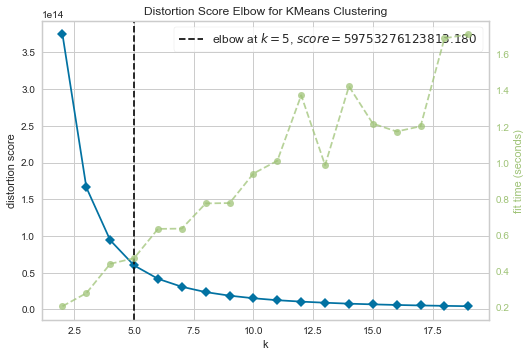

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
# Elbow Visualizer
model=KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,20))
visualizer.fit(april_s10)
visualizer.poof()


In [4]:
data_s10=april_s10.iloc[:,1:3]

In [5]:
data_s10.head()

,Lat,Lon
0,40.7566,-73.9875
1,40.7566,-73.9720
2,40.8071,-73.9660
3,40.6448,-73.7824
4,40.7387,-73.9887


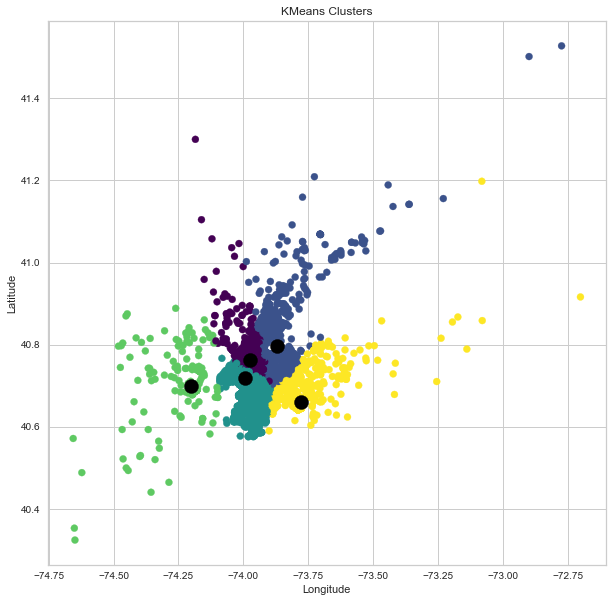

In [6]:
kmeans = KMeans(n_clusters=5).fit(data_s10)
y_kmeans = kmeans.predict(data_s10)
centers=kmeans.cluster_centers_

plt.figure(figsize=(10, 10))
plt.scatter(data_s10.Lon, data_s10.Lat, c=y_kmeans, cmap='viridis')
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200)
plt.title('KMeans Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
print('Silhouette score for KMeans is', silhouette_score(data_s10, kmeans.labels_))
print('Davies-Bouldin score for KMeans is', davies_bouldin_score(data_s10, kmeans.labels_))

In [ ]:
dbscan = DBSCAN(eps=0.01, min_samples=100, n_jobs=-1)
y_dbscan = dbscan.fit_predict(data_s10)

plt.figure(figsize=(10, 10))
plt.scatter(data_s10.Lon, data_s10.Lat, c=y_dbscan, cmap='viridis_r')
plt.title('DBSCAN Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Check the number of clusters
dbscan_df=data_s10
dbscan_df['labels']=dbscan.labels_
dbscan_df['labels'].value_counts()

In [ ]:
print('Silhouette score for DBSCAN is', silhouette_score(data_s10, dbscan.labels_))
print('Davies-Bouldin score for DBSCAN is', davies_bouldin_score(data_s10, dbscan.labels_))

In [ ]:
optics = OPTICS(min_samples=100)
y_optics=optics.fit_predict(data_s10)

plt.figure(figsize=(10, 10))
plt.scatter(data_s10.Lon, data_s10.Lat, c=y_optics, cmap='viridis_r')
plt.title('OPTICS Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
print('Silhouette score for OPTICS is', silhouette_score(data_s10, optics.labels_))
print('Davies-Bouldin score for OPTICS is', davies_bouldin_score(data_s10, optics.labels_))

In [ ]:
agglo = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_agglo=agglo.fit_predict(data_s10)

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(data_s10.Lon, data_s10.Lat, c=y_agglo, cmap='viridis_r')
plt.title('Agglomerative Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
print('Silhouette score for Agglomerative Clustering is', silhouette_score(data_s10, agglo.labels_))
print('Davies-Bouldin score for Agglomerative Clustering is', davies_bouldin_score(data_s10, agglo.labels_))

In [ ]:
# Get the kmeans cluster centers into a list
centers=kmeans.cluster_centers_
list1=centers.tolist()
list1

In [ ]:
# Create a new data frame with Lat and Lon and kmeans labels
data=data_s10
data['labels']=kmeans.labels_

In [ ]:
# Assign the kmeans labels valuses to clusters and split the data accordingly
cluster1 = data[['Lat','Lon']][data['labels']==0].values.tolist()
cluster2 = data[['Lat','Lon']][data['labels']==1].values.tolist()
cluster3 = data[['Lat','Lon']][data['labels']==2].values.tolist()
cluster4 = data[['Lat','Lon']][data['labels']==3].values.tolist()
cluster5 = data[['Lat','Lon']][data['labels']==4].values.tolist()


In [ ]:
# Generate the map with all points in the sample data and the cluster centers
map= folium.Map(location=[40.7128, -74.0060], zoom_start=10, tiles='Stamen Toner', prefer_canvas=True)


for i in range(0, len(cluster1)):
    folium.CircleMarker(cluster1[i], radius=1 ,color='purple').add_to(map)

for i in range(0, len(cluster2)):
    folium.CircleMarker(cluster2[i], radius=1 ,color='yellow').add_to(map)

for i in range(0, len(cluster3)):
    folium.CircleMarker(cluster3[i], radius=1 ,color='darkblue').add_to(map)

for i in range(0, len(cluster4)):
    folium.CircleMarker(cluster4[i], radius=1 ,color='cadetblue').add_to(map)

for i in range(0, len(cluster5)):
    folium.CircleMarker(cluster5[i], radius=1 ,color='lightgreen').add_to(map)

for i in list1:
    folium.Circle(radius=500, location=i, color="black").add_to(map)


In [ ]:
map

In [ ]:
dbscan_df

In [ ]:
dbcluster1 = dbscan_df[['Lat','Lon']][dbscan_df['labels']==0].values.tolist()
dbcluster2 = dbscan_df[['Lat','Lon']][dbscan_df['labels']==1].values.tolist()
dbcluster3 = dbscan_df[['Lat','Lon']][dbscan_df['labels']==2].values.tolist()
dbcluster4 = dbscan_df[['Lat','Lon']][dbscan_df['labels']==3].values.tolist()
dbcluster5 = dbscan_df[['Lat','Lon']][dbscan_df['labels']==4].values.tolist()
dbcluster6 = dbscan_df[['Lat','Lon']][dbscan_df['labels']==-1].values.tolist()

In [ ]:
# Generate the map with all points in the sample data and the cluster centers
db_map= folium.Map(location=[40.7128, -74.0060], zoom_start=10, tiles='Stamen Toner', prefer_canvas=True)


for i in range(0, len(cluster1)):
    folium.CircleMarker(cluster1[i], radius=1 ,color='purple').add_to(db_map)

for i in range(0, len(cluster2)):
    folium.CircleMarker(cluster2[i], radius=1 ,color='yellow').add_to(db_map)

for i in range(0, len(cluster3)):
    folium.CircleMarker(cluster3[i], radius=1 ,color='darkblue').add_to(db_map)

for i in range(0, len(cluster4)):
    folium.CircleMarker(cluster4[i], radius=1 ,color='cadetblue').add_to(db_map)

for i in range(0, len(cluster5)):
    folium.CircleMarker(cluster5[i], radius=1 ,color='lightgreen').add_to(db_map)

for i in range(0, len(cluster6)):
    folium.CircleMarker(cluster5[i], radius=1 ,color='darkgreen').add_to(db_map)    

db_map